<a href="https://colab.research.google.com/github/gustavogrds/TIC_01_2023/blob/main/Lab1_series_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Estacionariedade

A média e a variância de processos estacionários são constantes ao longo do tempo, intuitivamente isto significa que as observações se desenvolvem aleatoriamente entorno de um certo nível com variabilidade constante.

In [ ]:
# Séries temporais
df_1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações") #IBGE - Trimestral
df_2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar") #Economial UOL - diária

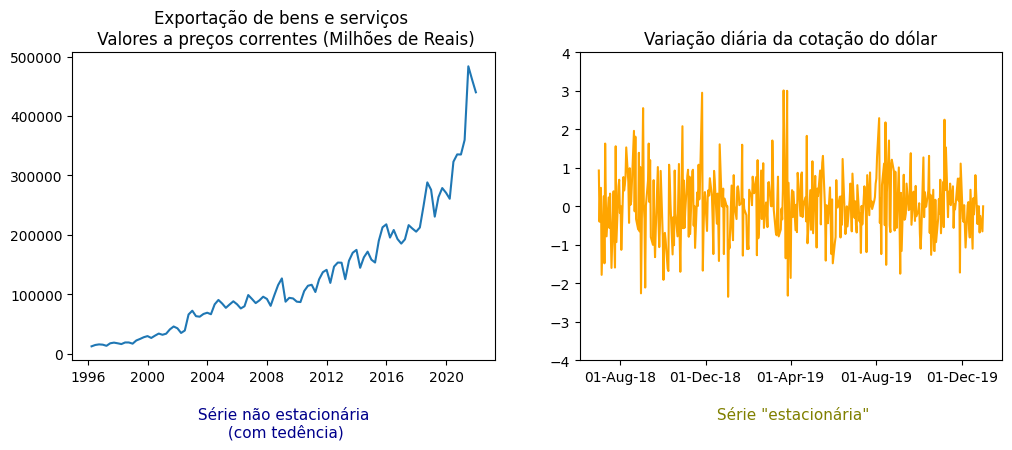

In [ ]:
#@markdown Gráfico das séries
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='3/1/1996', end='12/31/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')

df_1.index=index_dates1
df_2.index=index_dates2

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot(df_1.index, df_1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)',fontdict = {'fontsize' : 12})
ax1.set_xlabel('\n Série não estacionária \n (com tedência)',fontdict = {'fontsize' : 11},color="darkblue")


ax2.plot(df_2.index.to_pydatetime(), df_2["Var"], c='orange')
ax2.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax2.set_title('Variação diária da cotação do dólar',fontdict = {'fontsize' : 12})
ax2.set_xlabel('\n Série "estacionária"',fontdict = {'fontsize' : 11},color="olive")

ax2.set_ylim([-4, 4]);


### Teste Augmented Dickey-Fuller (ADF)

O teste de Dickey-Fuller Aumentado (ADF) é um teste estatístico comumente usado para verificar a presença de uma tendência estocástica em uma série temporal.

$$H_0: \text{A série não é estacionária}$$
$$H_1: \text{A série é estacionária}$$

Se o valor-p for menor que um determinado nível de significância (geralmente 0,05), então rejeitamos a hipótese nula e concluímos que a série é estacionária, ou seja, não possui uma tendência estocástica significativa.

In [ ]:
#  Exportações
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_1.Exportações)
print('p-value: %f' % result[1])

p-value: 0.997366


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_2.Var)
print('p-value: %f' % result[1])

p-value: 0.000000


#Decomposição de séries temporais

A decomposição de uma série temporal é o processo de separar a série em diferentes componentes: tendência, sazonalidade e componente aleatório, isto permite a detecção de padrões, identificação de tendências e sazonalidades, e auxiliando na previsão de valores da série.



<img src="http://www.orlandoalbarracin.com.br/phyton/decomposition.png" width=450, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

*   **Tendência**  direção geral dos dados ao longo do tempo, indica se a série está aumentando, diminuindo ou permanecendo estável ao longo de um período de tempo.

*   **Sazonalidade** refere-se a padrões que se repetem em períodos fixos de tempo, como estações do ano, dias da semana ou meses.

*   **Componente aleatório (erro)**: representa a variabilidade não explicada pela tendência e sazonalidade. 

# Australian beer production e Airline Passenger Numbers 

Produção mensal de cerveja na Austrália: megalitros. Não inclui bebidas com teor alcoólico inferior a 1,15.

###1.  Verifique visualmente se as séries apresentam tendências e/ou sazonalidades

In [ ]:
# Lendo os dados
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/monthly-beer-production-in-austr.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df=df.iloc[48:252,:].reset_index(drop=True)

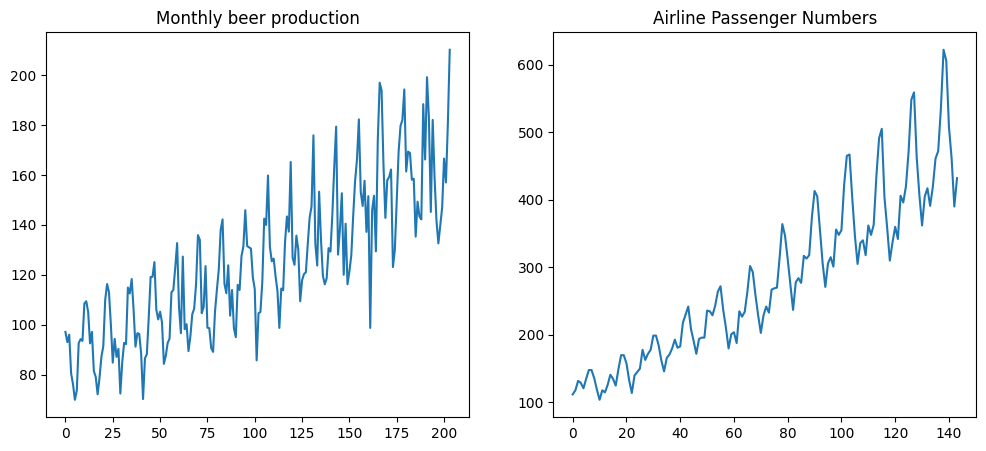

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df["Monthly beer production"])
plt.title("Monthly beer production")

plt.subplot(1,2,2)
plt.plot(df2["Passengers"])
plt.title("Airline Passenger Numbers")

plt.show()

Observação:

*   **Monthly beer production:**
A variação sazonal parece constante; ela não muda quando o valor da série temporal aumenta. Devemos usar o modelo aditivo.
$Valor = Tendência +  Sazonalidade + Erro$

*   **Airline Passenger Numbers** 
À medida que a série temporal aumenta em magnitude, a variação sazonal também aumenta. Nesse caso, devemos usar o modelo multiplicativo. $ Valor = Tendência \times Sazonalidade \times Erro$



### 2. Faça uma análise descritiva da produção de cerveja por mês. Em qual mês a produção é maior e em qual é menor?

In [ ]:
# Vamos ver o formato da base de dados!
df.head()

,Month,Monthly beer production
0,1960-01,97.1
1,1960-02,93.0
2,1960-03,96.0
3,1960-04,80.5
4,1960-05,76.1


In [ ]:
df[['Ano', 'Mês']] = df['Month'].apply(lambda x: pd.Series(x.split('-')))
df.drop("Month", axis=1, inplace=True)

In [ ]:
df.head()

,Monthly beer production,Ano,Mês
0,97.1,1960,01
1,93.0,1960,02
2,96.0,1960,03
3,80.5,1960,04
4,76.1,1960,05


<Axes: xlabel='Mês'>

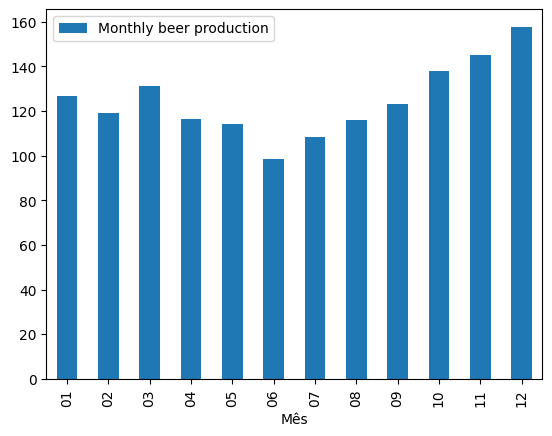

In [ ]:
# Produção por mês!

df.groupby("Mês").mean().plot(kind="bar")

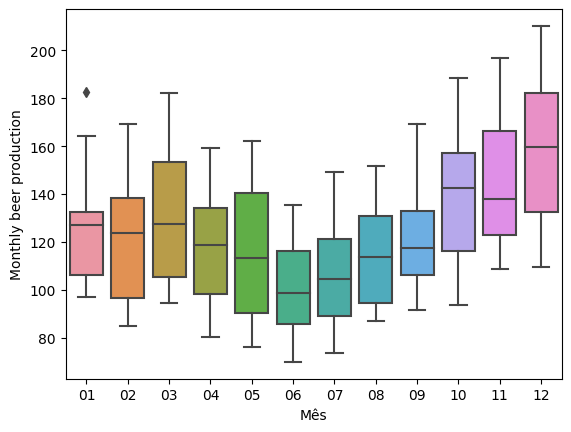

In [ ]:
# Produção por mês!
sns.boxplot(x="Mês", y="Monthly beer production", data=df)
plt.show()

###3. Ajuste um modelo de regressão linear para a série produção de cerveja. Faça as previsões para o próximo ano. Comente!

In [ ]:
# Vamos criar uma coluna com o tempo para ajustar o modelo de regressão

df["time"]=np.arange(len(df))
df.head()

,Monthly beer production,Ano,Mês,time
0,97.1,1960,01,0
1,93.0,1960,02,1
2,96.0,1960,03,2
3,80.5,1960,04,3
4,76.1,1960,05,4


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='df["Monthly beer production"] ~ time', data=df)
result = model.fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     df["Monthly beer production"]   R-squared:                       0.670
Model:                                       OLS   Adj. R-squared:                  0.668
Method:                            Least Squares   F-statistic:                     409.9
Date:                           Tue, 16 May 2023   Prob (F-statistic):           1.66e-50
Time:                                   17:30:53   Log-Likelihood:                -867.99
No. Observations:                            204   AIC:                             1740.
Df Residuals:                                202   BIC:                             1747.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# previsões 12 meses

new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 12)

In [ ]:
new_times['prediction'] = result.predict(new_times)
new_times.head()

,time,prediction
0,204,166.793862
1,205,167.206207
2,206,167.618553
3,207,168.030899
4,208,168.443244


<Axes: xlabel='time', ylabel='prediction'>

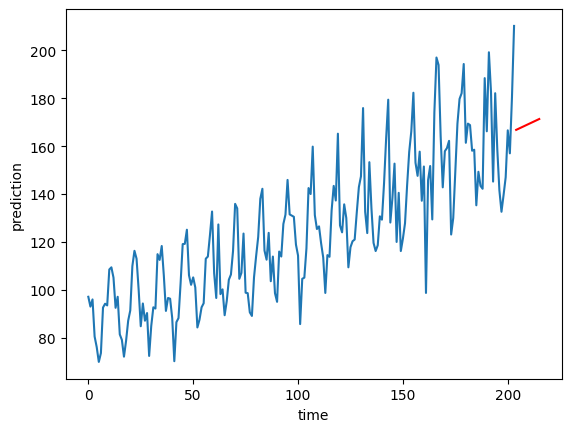

In [ ]:
plt.plot(df["Monthly beer production"])
sns.lineplot(x='time', y='prediction', data=new_times, color='red')

### 4. Faça a decomposição da série. Comente!

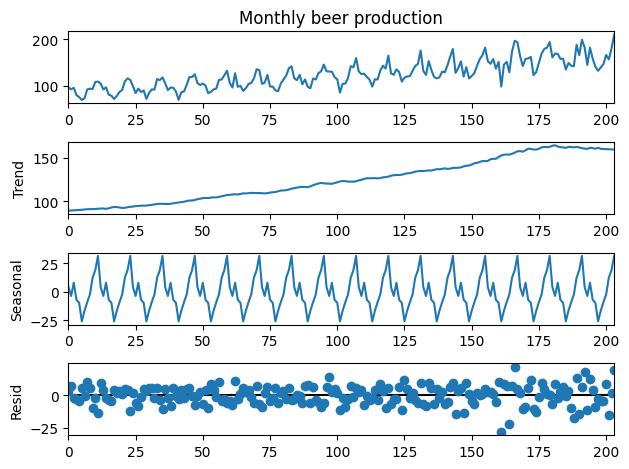

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df["Monthly beer production"], 
                                 model='additive', 
                                 period=12, 
                                 extrapolate_trend='freq')
decomposition.plot();

### 5. Analise como formam decompostos (tend+saz+resid) os valores da série em janeiro e dezembro de 1961.

In [ ]:
# Obter os componentes da decomposição

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
df["trend"]=trend
df["seasonal"]=seasonal
df["residual"]=residual

In [ ]:
df.head()

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
0,97.1,1960,01,0,89.312811,4.066108,3.721081
1,93.0,1960,02,1,89.518973,-3.676411,7.157438
2,96.0,1960,03,2,89.725136,7.859501,-1.584637
3,80.5,1960,04,3,89.931299,-6.991597,-2.439702
4,76.1,1960,05,4,90.137461,-9.723822,-4.313639


In [ ]:
df[(df.Ano=="1961") & (df.Mês=="01")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
12,105.1,1961,01,12,91.804167,4.066108,9.229725


In [ ]:
df[(df.Ano=="1961") & (df.Mês=="12")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
23,113.0,1961,12,23,93.7625,31.25264,-12.01514


###6. Verifique estatísticamente se os resíduos obtidos da decomposiçã da série são estacionários. Use $\alpha=0,05$.

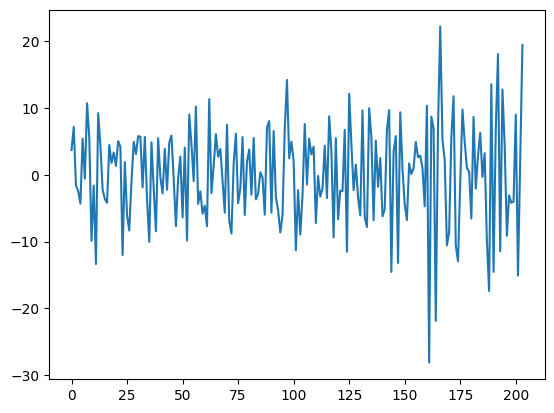

In [ ]:
plt.plot(df.residual);

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.residual)
print('p-value: %f' % result[1])

p-value: 0.000000


### 7. Responda as seguinte perguntas usando os dados Airline Passenger Numbers




*   A série é estacionária?
*   A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?
*   Em quais meses vende-se, em média, mais (menos) passagens aereas?
*   Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
*   Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro. 
Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100 .
*   Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.
*   Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.
*   Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.
*   Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.
*   Verifique estatísticamente se os resíduos são estacionários.